# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
7. Which giftors provide the most money, in total?

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1
df = pd.read_csv('./data/ForeignGifts_edu.csv')
df.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


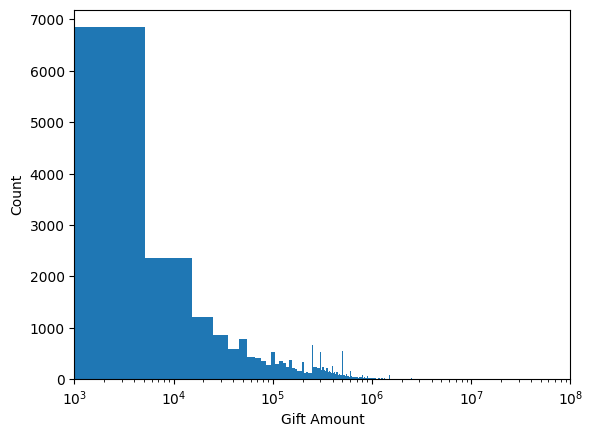

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64


In [27]:
# Question 2
plt.hist(df['Foreign Gift Amount'], bins = 10000)
plt.xscale('log') #otherwise almost all vals in rightmost bin
plt.xlim(1000,100000000)
plt.xlabel('Gift Amount')
plt.ylabel('Count')
plt.show()
print(df['Foreign Gift Amount'].describe())

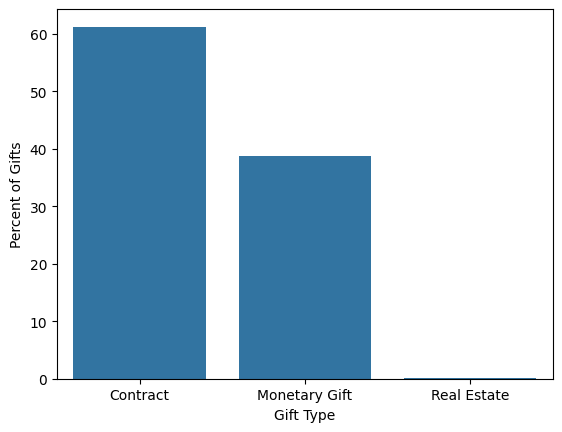

Gift Type
Contract         61.209737
Monetary Gift    38.751285
Real Estate       0.038978
Name: proportion, dtype: float64


In [36]:
# Question 3 
gift_type_prop = df["Gift Type"].value_counts(normalize=True) * 100

sns.barplot(x=gift_type_prop.index, y=gift_type_prop.values)
plt.ylabel("Percent of Gifts")
plt.show()
print(gift_type_prop)

/var/folders/xl/310109g14sg2kt37m2ch56h80000gn/T/ipykernel_89072/2915232961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Log FGA'] = np.log(df_new['Foreign Gift Amount'])


Text(0.5, 0, 'Foreign Gift Amount (Log Scale)')

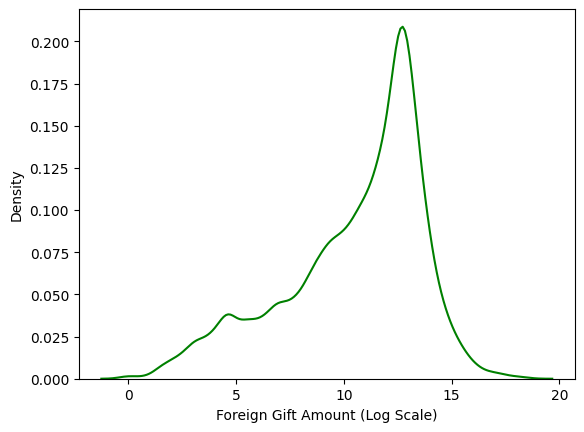

In [42]:
# Question 4
df_new = df[df['Foreign Gift Amount']>0] #Removes negative values that will make log graph not work
df_new['Log FGA'] = np.log(df_new['Foreign Gift Amount'])
sns.kdeplot(df_new['Log FGA'], color='green')
plt.xlabel('Foreign Gift Amount (Log Scale)')

Text(0.5, 0, 'Foreign Gift Amount (Log Scale)')

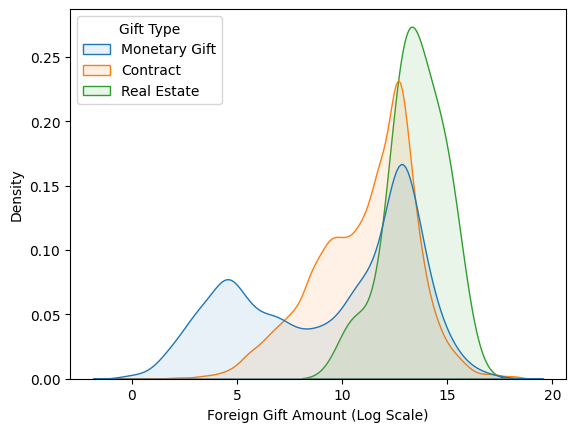

In [ ]:
#Question 4 Cont.
sns.kdeplot(data=df_new, x="Log FGA", hue="Gift Type", fill=True, common_norm=False, alpha = 0.1)
plt.xlabel('Foreign Gift Amount (Log Scale)')

In [62]:
# Question 5
print('Top 15 Countries by Number of Gifts \n', df['Country of Giftor'].value_counts().head(15)) #.value_counts auto sorts so can just grab first 15

Top 15 Countries by Number of Gifts 
 Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64
Top 15 Countries by Total Gifted 
 Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA      

In [63]:
# Question 5 Cont
print('Top 15 Countries by Total Gifted \n', df.groupby("Country of Giftor")["Foreign Gift Amount"].sum().nlargest(15))

Top 15 Countries by Total Gifted 
 Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64


In [64]:
# Question 6
print('Top 15 Countries by Total Gifted \n', df.groupby("Institution Name")["Foreign Gift Amount"].sum().nlargest(15))

Top 15 Countries by Total Gifted 
 Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


Text(0, 0.5, 'Count')

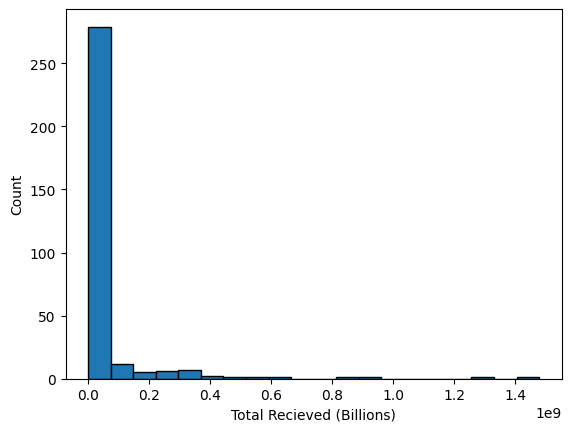

In [83]:
# Question 6 Cont
uni_totals = df.groupby('Institution Name')['Foreign Gift Amount'].sum()
plt.hist(uni_totals, bins=20, edgecolor='black')
plt.xlabel("Total Recieved (Billions)")
plt.ylabel('Count')

In [88]:
top_giftors = df[~df["Giftor Name"].str.contains("anonymous", case=False, na=False)]
top_15 = top_giftors.groupby("Giftor Name")["Foreign Gift Amount"].sum().nlargest(15)

print('Top 15 Giftors by Total Gifted \n',top_15)

Top 15 Giftors by Total Gifted 
 Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Sanofi-Aventis Recerche                  62106706
Saudi Arabia                             59450098
Name: Foreign Gift Amount, dtype: int64


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [89]:
# Question 1
df2 = pd.read_csv('./data/airbnb_hw.csv')

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [91]:
#Question 2
print(df2.shape) # 30478 Obs with 13 columns
df2.head() #Shows all variables and entries for first 5 rows

(30478, 13)


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [92]:
# Question 3
pd.crosstab(df2['Property Type'], df2['Room Type'])

Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Apartment,15669,10748,685
Bed & Breakfast,13,155,12
Boat,7,1,0
Bungalow,4,0,0
Cabin,1,1,0
Camper/RV,6,1,0
Castle,0,1,0
Chalet,0,1,0
Condominium,72,22,0


This table shows that in houses it is more common to be able to rent a private room as opposed to the whole property, whereas in apartments it is the other way around. It also shows apartments have by far the most options for renting shared rooms.

count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64


Text(0.5, 0, 'Price')

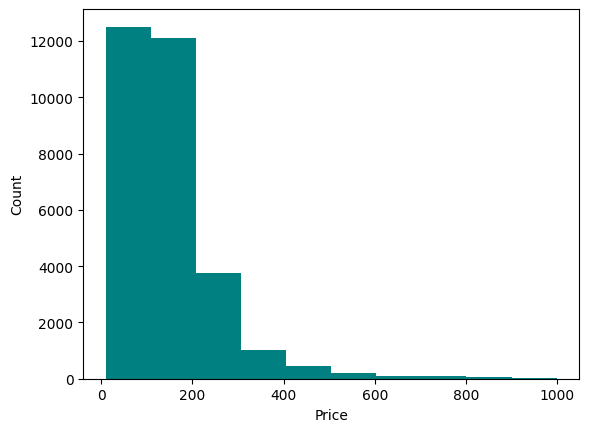

In [95]:
df2['Price'] = pd.to_numeric(df2['Price'],errors='coerce')
print(df2['Price'].describe())
df2['Price'].hist(color='teal')
plt.grid(False)
plt.ylabel('Count')
plt.xlabel('Price')

(0.0, 1250.0)

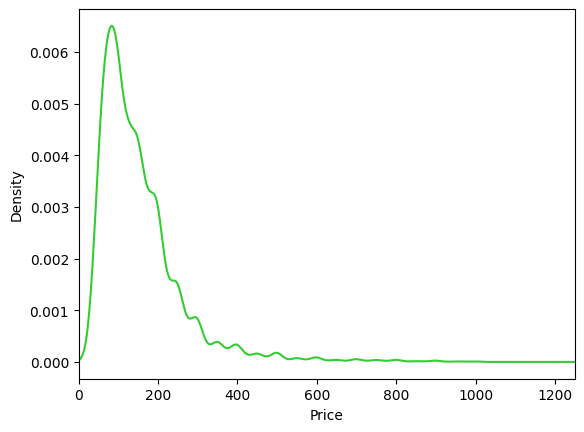

In [100]:
df2['Price'].plot.density(color='limegreen')
plt.xlabel('Price')
plt.xlim(0,1250)

<Axes: >

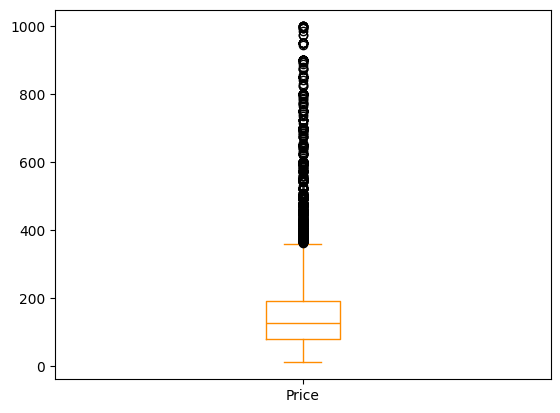

In [110]:
df2['Price'].plot.box(color = 'darkorange')

In [115]:
df2['Price'].describe()

count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64

The max being about 5 times the 75th percentile confirms the right skew that is shown in these graphs

In [116]:
df2['Log_Price'] = np.log(df2['Price']) #new col w log of price

Text(0, 0.5, 'Count')

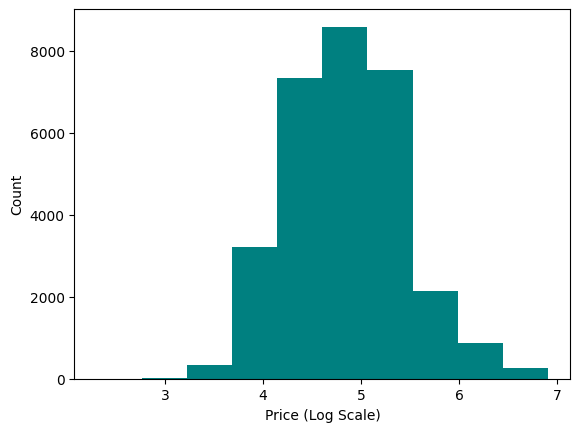

In [119]:
plt.hist(df2['Log_Price'], color = 'teal')
plt.xlabel('Price (Log Scale)')
plt.ylabel('Count')

Text(0.5, 0, 'Price (Log Scale)')

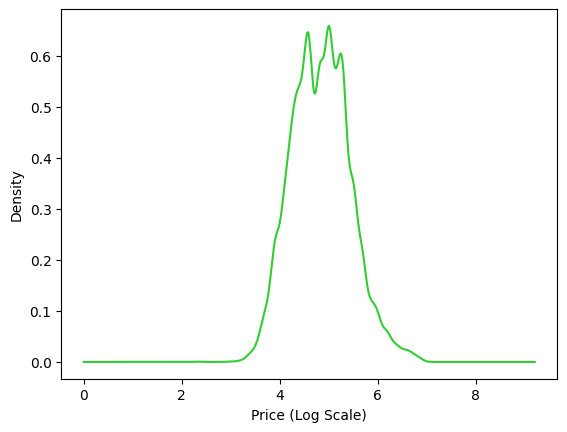

In [123]:
df2['Log_Price'].plot.density(color = 'limegreen')
plt.xlabel('Price (Log Scale)')

<Axes: >

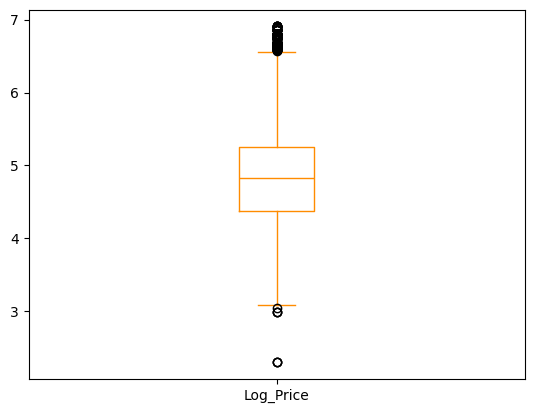

In [124]:
df2['Log_Price'].plot.box(color = 'darkorange')

In [125]:
df2['Log_Price'].describe()

count    30297.000000
mean         4.845370
std          0.596999
min          2.302585
25%          4.382027
50%          4.828314
75%          5.257495
max          6.906755
Name: Log_Price, dtype: float64

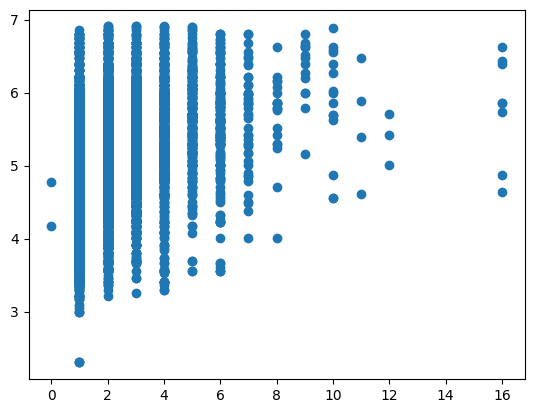

In [127]:
#Question 5
plt.scatter(x=df2['Beds'], y=df2['Log_Price'])

In [128]:
df2['Log_Price'].groupby(df2['Beds']).describe()

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,4.476755,0.427613,4.174387,4.325571,4.476755,4.627939,4.779123
1.0,20307.0,4.682084,0.527569,2.302585,4.317488,4.605170,5.043425,6.856462
2.0,6561.0,5.077679,0.546961,3.218876,4.744932,5.075174,5.416100,6.906755
3.0,2029.0,5.297638,0.572851,3.258097,4.941642,5.298317,5.700444,6.906755
4.0,766.0,5.438240,0.666451,3.295837,5.010635,5.480639,5.896449,6.906755
5.0,274.0,5.596976,0.624868,3.555348,5.225704,5.652489,6.052089,6.902743
6.0,166.0,5.538625,0.712393,3.555348,5.212968,5.602112,5.988961,6.802395
7.0,45.0,5.617009,0.693481,4.007333,5.176150,5.703782,6.098074,6.802395
8.0,20.0,5.674340,0.579810,4.007333,5.386655,5.826995,6.012435,6.620073


Looking at the scatter plot, the positive correlation was less extreme than I anticipated and evaluation of the table shows the same trend. While prices generally go up with amount of beds, it is not by a massive amount.

<Axes: xlabel='Beds', ylabel='Log_Price'>

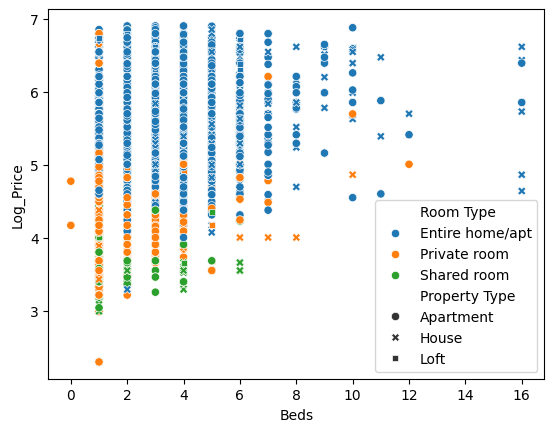

In [133]:
df2_sig = df2[df2["Property Type"].isin(["House", "Apartment", "Loft"])] #only takes in high sample sizes so next chart is readible
sns.scatterplot(data=df2_sig, x='Beds', y='Log_Price', hue='Room Type', style='Property Type')

This chart makes it obvious that, regardless of property type, renting an entire property is typically going to be more expensive than a private room, which will typically be more expensive than a shared room.

In [134]:
df2.groupby(['Room Type', 'Property Type'])['Price'].describe()

count        mean         std    min  \
Room Type       Property Type                                             
Entire home/apt Apartment        15550.0  200.210161  109.967435   10.0   
                Bed & Breakfast     13.0  184.538462  119.814172   85.0   
                Boat                 7.0  158.428571   51.110524  100.0   
                Bungalow             4.0  150.750000   46.464144   87.0   
                Cabin                1.0  250.000000         NaN  250.0   
                Camper/RV            6.0  114.333333  107.685963   45.0   
                Condominium         71.0  281.126761  175.313998   80.0   
                Dorm                 4.0   44.250000   24.060687   30.0   
                House              723.0  234.554633  159.785974   27.0   
                Lighthouse           1.0   39.000000         NaN   39.0   
                Loft               379.0  284.910290  184.515517   55.0   
                Other               10.0  290.800000  273.526273   66.0   
                Townhouse           81.0  242.037037  166.755243   66.0   
                Villa                3.0  206.333333   89.667906  120.0   
Private room    Apartment        10741.0   91.605903   46.356168   10.0   
                Bed & Breakfast    155.0   97.161290   47.031971   32.0   
                Boat                 1.0  120.000000         NaN  120.0   
                Cabin                1.0   80.000000         NaN   80.0   
                Camper/RV            1.0   39.000000         NaN   39.0   
                Castle               1.0  150.000000         NaN  150.0   
                Chalet               1.0   99.000000         NaN   99.0   
                Condominium         22.0   98.590909   40.576394   46.0   
                Dorm                16.0   86.562500   40.738137   50.0   
                House             1258.0   77.750397   49.402650   25.0   
                Hut                  2.0   75.000000   35.355339   50.0   
                Loft               310.0   99.077419   63.875489   39.0   
                Other               28.0  176.642857  141.484252   39.0   
                Tent                 4.0  126.250000   94.989034   40.0   
                Townhouse           52.0   83.365385   30.578109   45.0   
                Treehouse            1.0   95.000000         NaN   95.0   
                Villa                4.0  126.250000   71.107313   60.0   
Shared room     Apartment          684.0   77.853801   57.875888   20.0   
                Bed & Breakfast     12.0  143.666667  245.328104   30.0   
                Dorm                11.0   73.181818   46.328864   30.0   
                House               79.0   46.822785   25.152743   10.0   
                Loft                49.0   78.816327   87.521824   30.0   
                Other                4.0  148.750000  134.806961   70.0   
                Townhouse            1.0   95.000000         NaN   95.0   
                Treehouse            3.0  167.666667  114.788211   95.0   

                                    25%    50%     75%    max  
Room Type       Property Type                                  
Entire home/apt Apartment        135.00  175.0  230.00  999.0  
                Bed & Breakfast  121.00  130.0  220.00  525.0  
                Boat             122.50  150.0  182.00  250.0  
                Bungalow         133.50  160.5  177.75  195.0  
                Cabin            250.00  250.0  250.00  250.0  
                Camper/RV         49.00   74.0  114.00  325.0  
                Condominium      155.00  200.0  360.00  850.0  
                Dorm              30.00   33.5   47.75   80.0  
                House            125.00  188.0  299.00  950.0  
                Lighthouse        39.00   39.0   39.00   39.0  
                Loft             160.00  220.0  350.00  985.0  
                Other            123.75  177.5  350.00  850.0  
                Townhouse        135.00  189.0  295.00  900.0  

The room type with the highest prices is entire property. Lofts, townhouses, apartments, and the 'other' category have consistently high average prices. Other also has the highest standard deviation, likely due the fact that it is a grouping of potentially unlike, and obscure properties. The median shows as a better estimate of central tendency because of the overall skew of the data to the higher end, creating bias in the mean. 

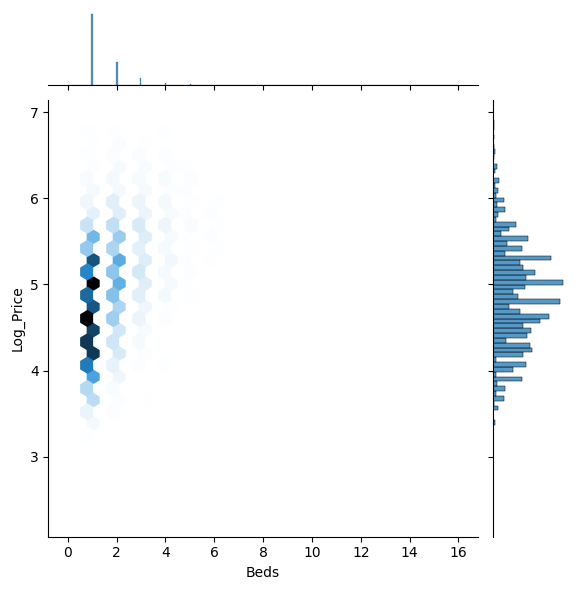

In [135]:
sns.jointplot(data=df2, x='Beds', y='Log_Price', kind='hex', gridsize=30)

This shows that the overwhelming majority of the data lies in the 1-3 bed range, showing that focusing on this range will give more insightful conclusions. A cleaned dataset that focuses on the most common property types and those with fewer total beds may be more impactful when evaluating the trends.

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.